In [1]:
import pandas as pd 
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
import numpy as np
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [2]:
df = pd.read_excel('C:/Users/Khang/OneDrive/Desktop/Project 3/Dataset.xlsx')
df.head()

,Date Range,Week,Promo,2017,Retail A,Retail B,Retail C,Base $,Incremental $,Spreed of Distribution,2018
0,1/1/2017 - 1/7/2017,Week 1,304,1118747.20,347779.52,248023.30,71077.96,445135.415824,112930.214804,0.602975,599735.62
1,1/8/2017 - 1/14/2017,Week 2,40,1454751.95,425891.20,139992.16,8792.72,509839.033680,218023.439066,0.814072,1182241.40
2,1/15/2017 - 1/21/2017,Week 3,149,1545573.47,133027.20,258435.94,12694.50,528809.222592,212050.720906,0.660763,836972.53
3,1/22/2017 - 1/28/2017,Week 4,112,2112803.36,485702.40,227776.50,39447.94,543341.438510,173889.606378,0.650383,3031423.66
4,1/29/2017 - 2/4/2017,Week 5,261,2922590.24,965866.88,226185.68,47065.90,534841.636851,276300.910043,0.608713,2175285.13


In [3]:
df = df.drop(['Date Range', 'Week'], axis = 1)
df.head()

,Promo,2017,Retail A,Retail B,Retail C,Base $,Incremental $,Spreed of Distribution,2018
0,304,1118747.20,347779.52,248023.30,71077.96,445135.415824,112930.214804,0.602975,599735.62
1,40,1454751.95,425891.20,139992.16,8792.72,509839.033680,218023.439066,0.814072,1182241.40
2,149,1545573.47,133027.20,258435.94,12694.50,528809.222592,212050.720906,0.660763,836972.53
3,112,2112803.36,485702.40,227776.50,39447.94,543341.438510,173889.606378,0.650383,3031423.66
4,261,2922590.24,965866.88,226185.68,47065.90,534841.636851,276300.910043,0.608713,2175285.13


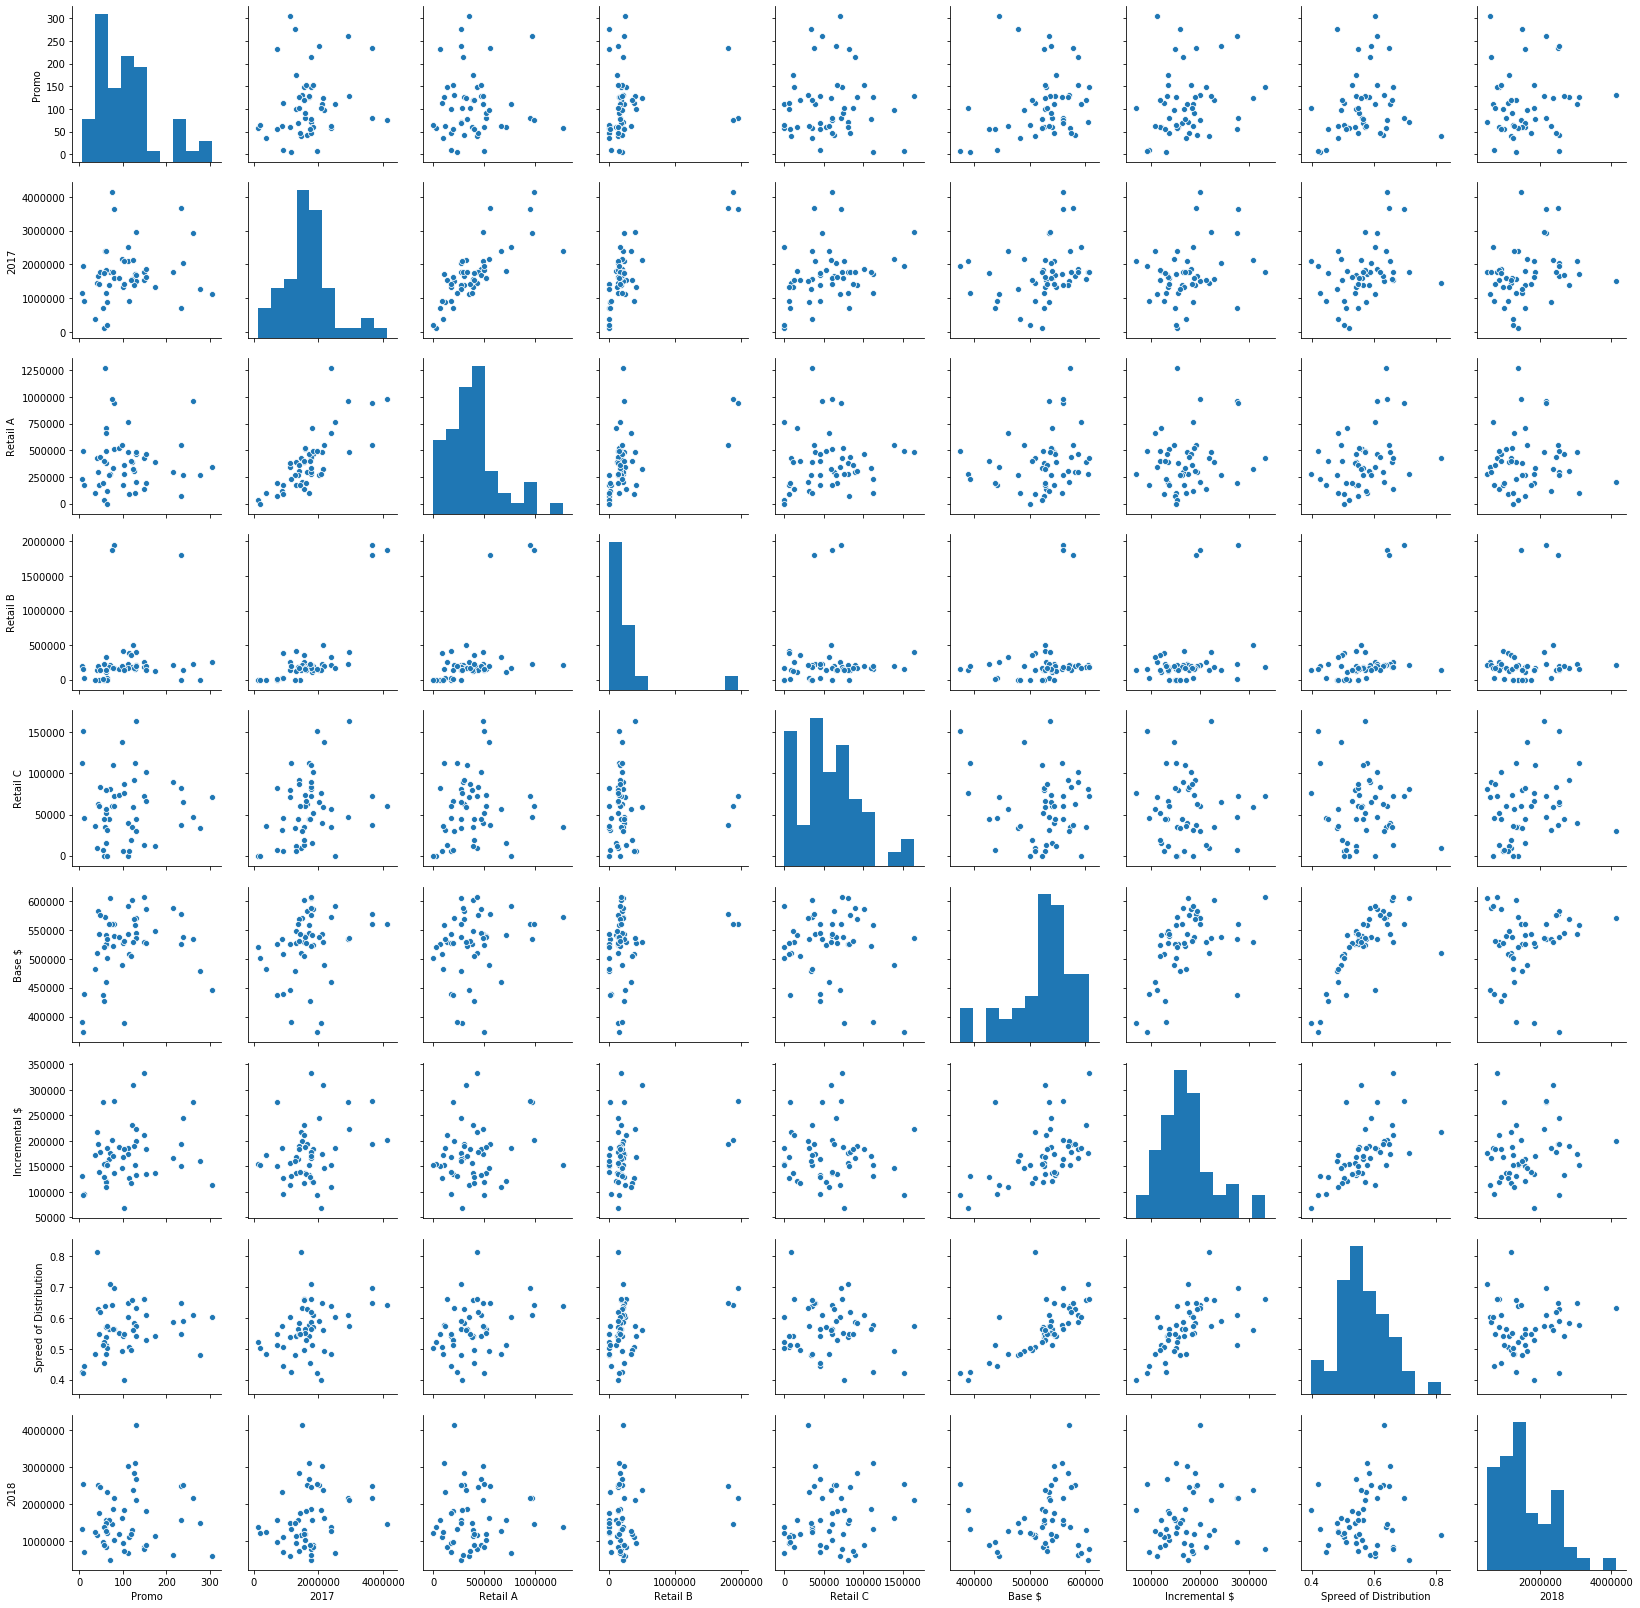

In [4]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df)


In [5]:
X = df.drop(2018, axis=1)
y = df[2018]
print(X.shape, y.shape)

(52, 8) (52,)


In [6]:
y.head()

0     599735.62
1    1182241.40
2     836972.53
3    3031423.66
4    2175285.13
Name: 2018, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.6, random_state=310)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5, random_state=310)

model = RandomForestRegressor(n_estimators=3000, oob_score=True, n_jobs=-1, random_state=310)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8240782628863077, 0.2058991341862647)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=310)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5, random_state=310)

model = RandomForestRegressor(n_estimators=10000, oob_score=True, n_jobs=-1, random_state=310)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8519409223653671, -0.19630142155776742)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.6, random_state=310)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5, random_state=310)

model = RandomForestRegressor(n_estimators=100000, oob_score=True, n_jobs=-1, random_state=310)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8250050131353776, 0.18886632805898584)

# MinMaxScaler


Due to having a low train and test rate. I am now attemping to add MinMax Scaler to narrow the variance between my numbers.

In [10]:
scaler = MinMaxScaler()
print(scaler.fit(df))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [11]:
print(scaler.data_max_)

[3.04000000e+02 4.12848740e+06 1.26795520e+06 1.95558538e+06
 1.64209140e+05 6.07322354e+05 3.33561203e+05 8.14071796e-01
 4.14503631e+06]


In [12]:
df1= scaler.transform(df)

I've discovered that transfroming the df is not very usful and what I should do instead is apply the change to my X.

In [13]:
X1 = scaler.fit(X)
X1 = scaler.transform(X)

In [14]:
X1 = pd.DataFrame(X1)
X1.head()

,0,1,2,3,4,5,6,7
0,1.000000,0.248226,0.274284,0.126828,0.432850,0.304774,0.166649,0.492190
1,0.114094,0.332153,0.335888,0.071586,0.053546,0.582131,0.563599,1.000000
2,0.479866,0.354839,0.104915,0.132153,0.077307,0.663448,0.541040,0.631204
3,0.355705,0.496522,0.383060,0.116475,0.240230,0.725741,0.396900,0.606234
4,0.855705,0.698791,0.761752,0.115661,0.286622,0.689306,0.783721,0.505994


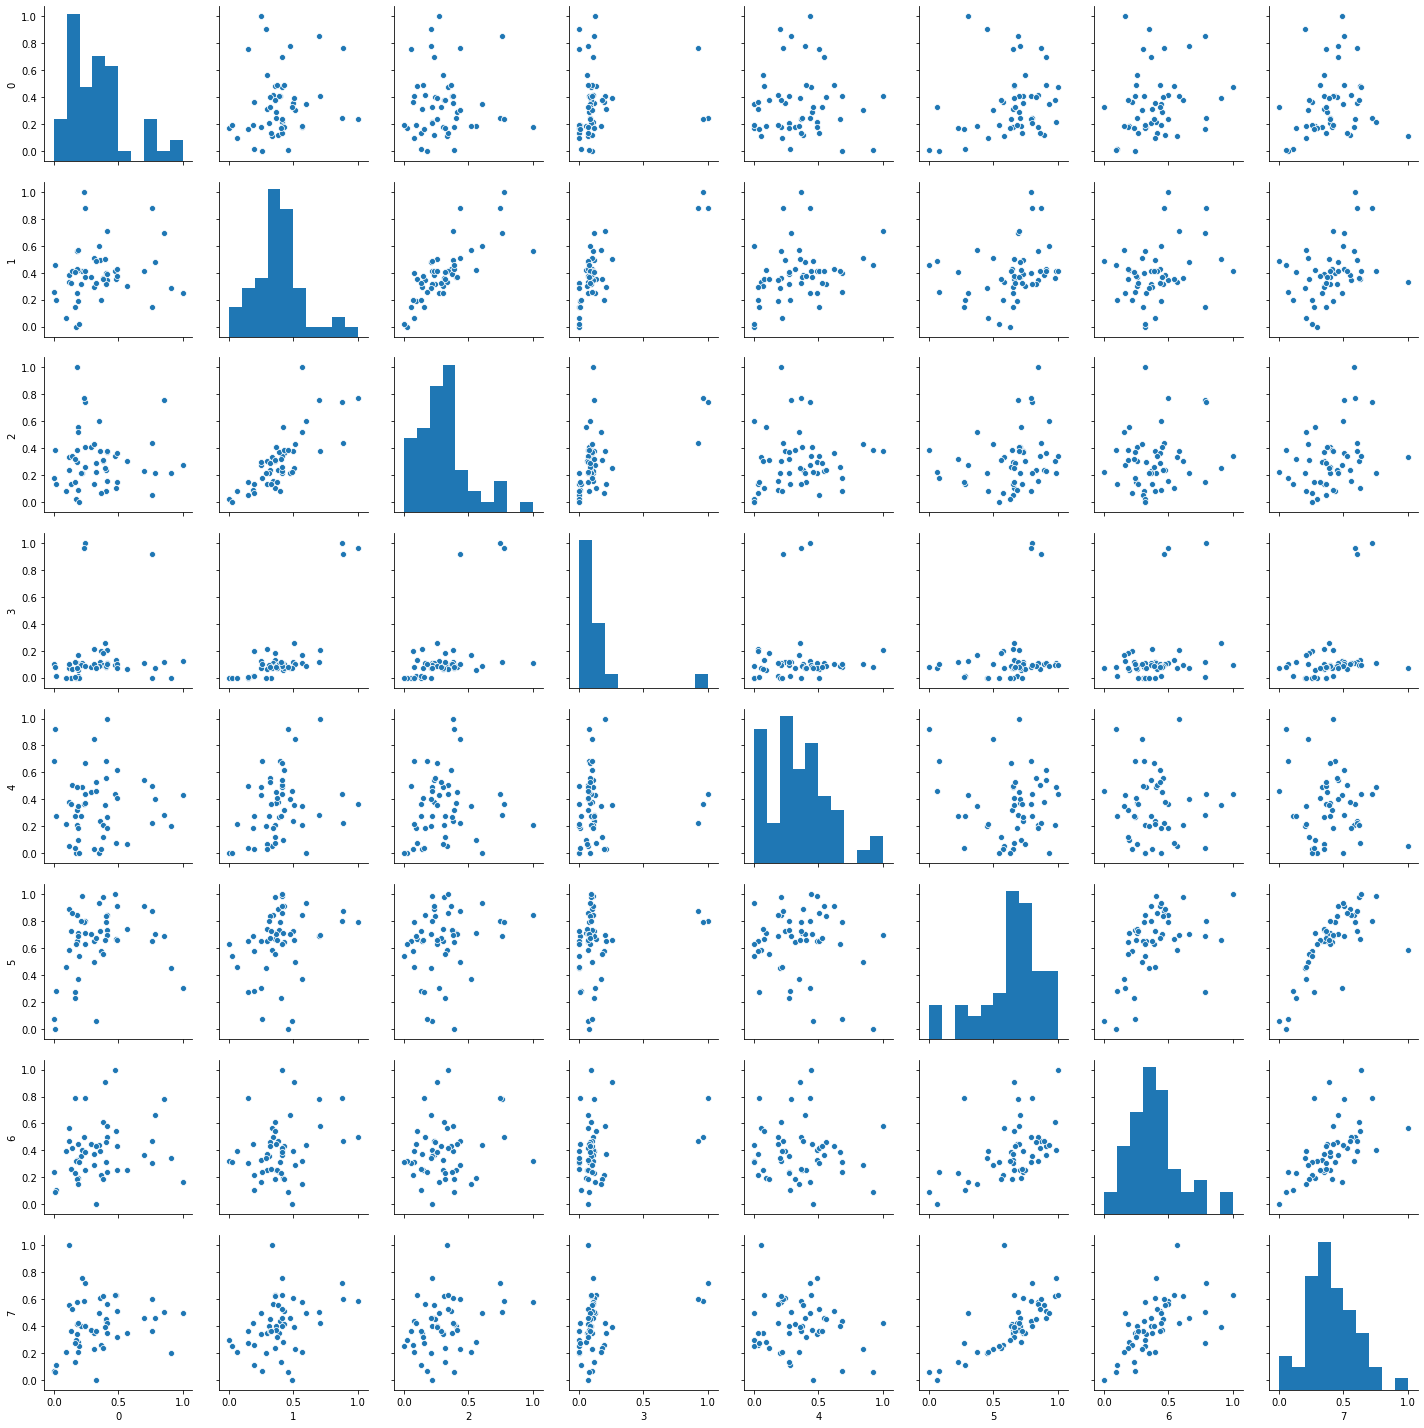

In [15]:
%matplotlib inline
sns.pairplot(X1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=.6, random_state=310)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5, random_state=310)

model = RandomForestRegressor(n_estimators=3000, oob_score=True, n_jobs=-1, random_state=310)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8240782628863077, 0.20589913418626482)

# Standard Scaler 

In hopes to better train my model. 

In [17]:
scaler = StandardScaler()
X1 = scaler.fit(X)
X1 = scaler.transform(X)
X1 = pd.DataFrame(X1)
X1.head()

,0,1,2,3,4,5,6,7
0,2.830864,-0.747404,-0.158196,-0.058844,0.354777,-1.463758,-1.120269,0.473202
1,-0.997914,-0.315921,0.147744,-0.320770,-1.262757,-0.276256,0.833050,3.174863
2,0.582907,-0.199292,-0.999317,-0.033598,-1.161428,0.071904,0.722038,1.212789
3,0.046298,0.529119,0.382007,-0.107933,-0.466647,0.338613,0.012755,1.079942
4,2.207237,1.569012,2.262667,-0.111790,-0.268811,0.182616,1.916227,0.546644


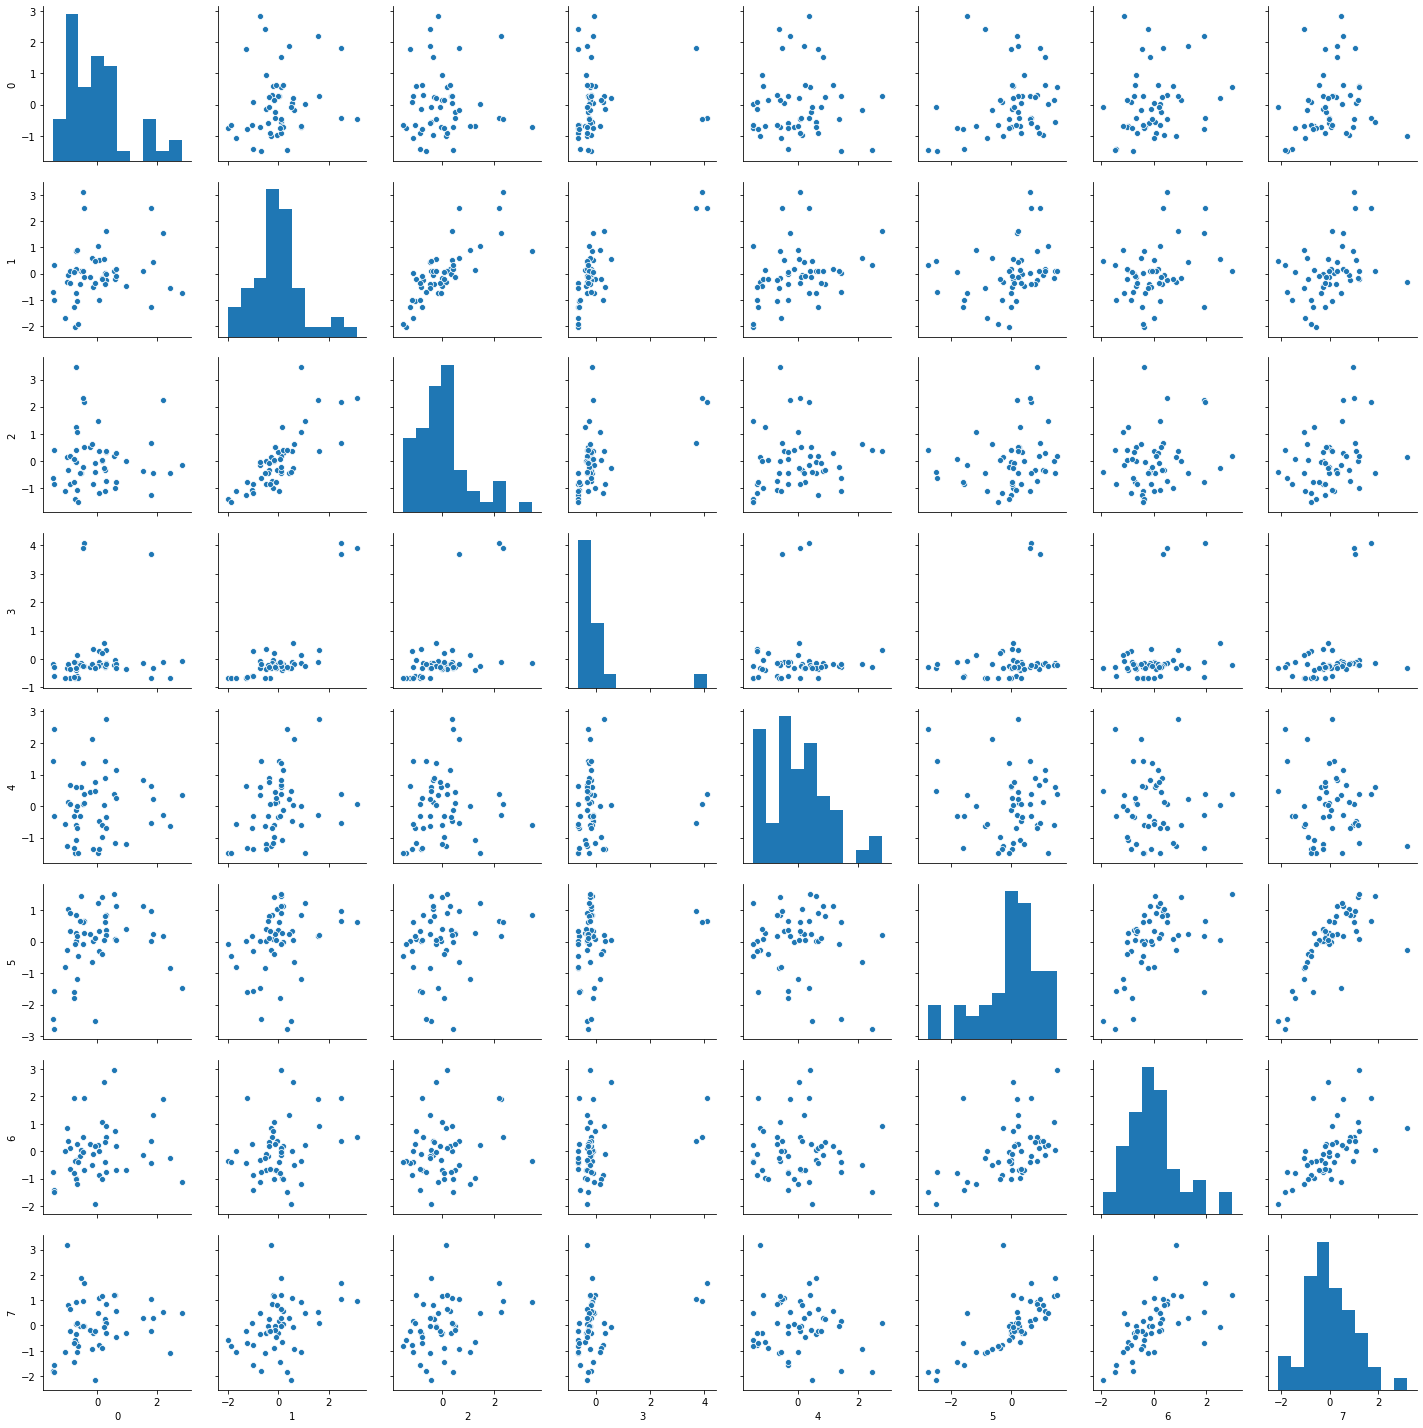

In [18]:
%matplotlib inline
sns.pairplot(X1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=.6, random_state=310)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5, random_state=310)

model = RandomForestRegressor(n_estimators=3000, oob_score=True, n_jobs=-1, random_state=310)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8240782628863077, 0.20417581831789322)

In [20]:
pred = model.predict(X1)
pred

array([1079863.81515995, 1271105.99730337, 2038908.73372998,
       2488328.76753995, 2048946.9859834 , 1703206.62067333,
       1628441.5998233 , 1641293.13043664, 2346333.37896006,
       1454303.7612133 , 1818974.45329664, 1357629.63262994,
       2250560.53851334, 1816182.54708998, 1522762.27823998,
       1466749.75513663, 2490525.18510004, 1847775.87992332,
       1261620.61389996, 1892634.11023333, 1252963.76354664,
       2298396.08993671, 1405613.13447998, 1551493.91681   ,
       1943693.39584335, 1793784.30597   , 1001414.75886664,
       1321973.35913327, 1256075.03728332, 1975582.83622661,
       1770146.12324332, 1564280.29616   , 1628230.37814666,
       1255363.49368666, 2084385.94493001, 1062754.15099003,
       1591387.75395333, 1696061.88609332, 2055899.90356335,
       1846467.40798668, 1715730.49862001, 1673646.78009   ,
       1325266.99806   , 1569810.03192998, 1271092.9519367 ,
       1658236.90443667, 1065069.0822367 , 1089851.94921001,
       1517392.56444668,

In [21]:
machinelearning = pd.DataFrame(y)
machinelearning['pred']= pred
machinelearning['pred'] = machinelearning['pred'].map("${:.2f}".format)
machinelearning[2018] = machinelearning[2018].map("${:.2f}".format)
machinelearning.head()

,2018,pred
0,$599735.62,$1079863.82
1,$1182241.40,$1271106.00
2,$836972.53,$2038908.73
3,$3031423.66,$2488328.77
4,$2175285.13,$2048946.99


# fbProphet

Training the data with Machine learning-RandomForestRegression, I am now going to use fbPropeht to see how close I can get the numbers to match the actuals. My hope is that fpProphet will narrow the gap between prediction and actuals.

In [22]:
df2 = pd.read_excel('C:/Users/Khang/OneDrive/Desktop/Project 3/Dataset1.xlsx')
df2 = df2[['Date Range', 2017]]
df2.head()

,Date Range,2017
0,2017-01-01,1118747.20
1,2017-01-08,1454751.95
2,2017-01-15,1545573.47
3,2017-01-22,2112803.36
4,2017-01-29,2922590.24


In [23]:
df2.columns = ['ds','y']
df2.ds = pd.to_datetime(df2.ds)
df2.head()

,ds,y
0,2017-01-01,1118747.20
1,2017-01-08,1454751.95
2,2017-01-15,1545573.47
3,2017-01-22,2112803.36
4,2017-01-29,2922590.24


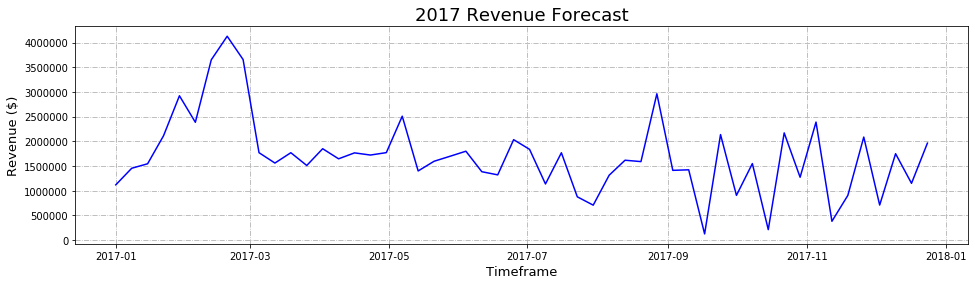

In [24]:
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')


plt.plot(df2.ds, df2.y, 'b')

# set title & labels
plt.title('2017 Revenue Forecast', fontsize=18)
plt.ylabel('Revenue ($)', fontsize=13)
plt.xlabel('Timeframe', fontsize=13)


plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
C:\Users\Khang\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



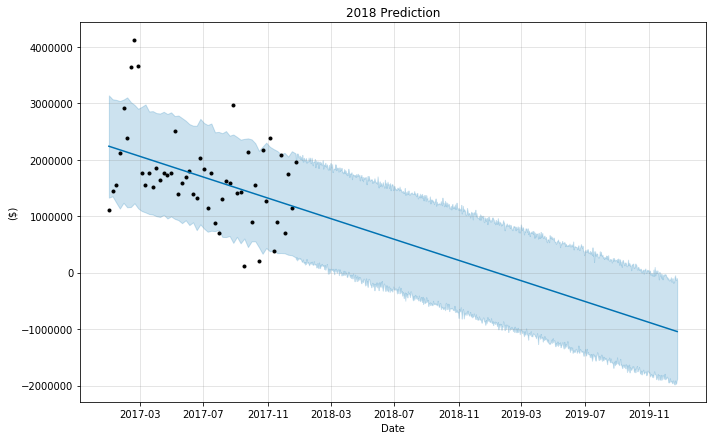

In [25]:
prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=False)
prophet.fit(df2)
build_forecast = prophet.make_future_dataframe(periods=365*2, freq='D')
forecast = prophet.predict(build_forecast)
prophet.plot(forecast, xlabel='Date', ylabel='($)')
plt.title('2018 Prediction')
plt.show()

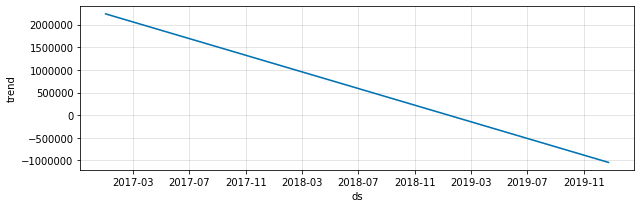

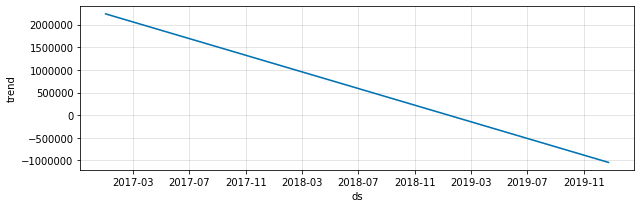

In [26]:
prophet.plot_components(forecast)

In [33]:
future_preds = forecast.loc[forecast.ds > '2019-07-02']
future_preds = future_preds[['ds','yhat','yhat_lower','yhat_upper']]
future_preds.sample(5)

,ds,yhat,yhat_lower,yhat_upper
772,2019-12-15,-1.016370e+06,-1.960519e+06,-97037.278160
749,2019-11-22,-9.469005e+05,-1.898669e+06,-57848.780956
769,2019-12-12,-1.007309e+06,-1.925043e+06,-82197.997255
653,2019-08-18,-6.569414e+05,-1.588875e+06,243769.911981
759,2019-12-02,-9.771045e+05,-1.880256e+06,-32078.223899
